# Nyquist Diagram, AC Simulation Example

In this example, we run a **AC** simulation of an ideal LDO model, then, plot a Nyquist diagram.

This is the same code saved in the **22_NyquistDia.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [1]:
from PyQSPICE import clsQSPICE as pqs

import re
import math
import cmath
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

print("\n\nThis example needs, newer version of the PyQSPICE: " + pqs.version() + ".\n\n")

fname = "VRM_Nyquist"

run = pqs(fname)

run.InitPlot()

run.qsch2cir()
run.cir2qraw()

run.setNline(2048)

g = "V(VOUT)/V(VO)"

df = (run.LoadQRAW([g])).rename(columns = {g: "res"})

df = run.GainPhase(df, "res", "gain", "phase", "reGain", "imGain", -1)

# Bring back some data "real"
run.comp2real(df, ["Step", "reGain", "imGain", "gain", "phase", run.sim['Xlbl']])

print(df)



This example needs, newer version of the PyQSPICE: 2023.12.11.


              Freq                         res  Step       gain       phase  \
0     1.000000e+00 -22203.007268+14427.197050j   0.0  88.457908  146.984764   
1     1.009035e+00 -22084.008721+14479.537420j   0.0  88.434573  146.748863   
2     1.018152e+00 -21964.153334+14531.079084j   0.0  88.410942  146.512113   
3     1.027351e+00 -21843.451418+14581.805098j   0.0  88.387014  146.274529   
4     1.036633e+00 -21721.913710+14631.698640j   0.0  88.362786  146.036123   
...            ...                         ...   ...        ...         ...   
2044  9.646616e+07      0.000000+    0.000014j   0.0 -97.048140   89.827158   
2045  9.733774e+07      0.000000+    0.000014j   0.0 -97.142477   89.825994   
2046  9.821719e+07      0.000000+    0.000014j   0.0 -97.237140   89.824817   
2047  9.910459e+07      0.000000+    0.000014j   0.0 -97.332135   89.823626   
2048  1.000000e+08      0.000000+    0.000013j   0.0 -97.427470 

> ***Note*** that the gain calculation of "df = df.apply()" makes everything "complex".  So we re-convert known "non-complex" data to "real".

## 2. Bode Plot, before Nyquist Diagram

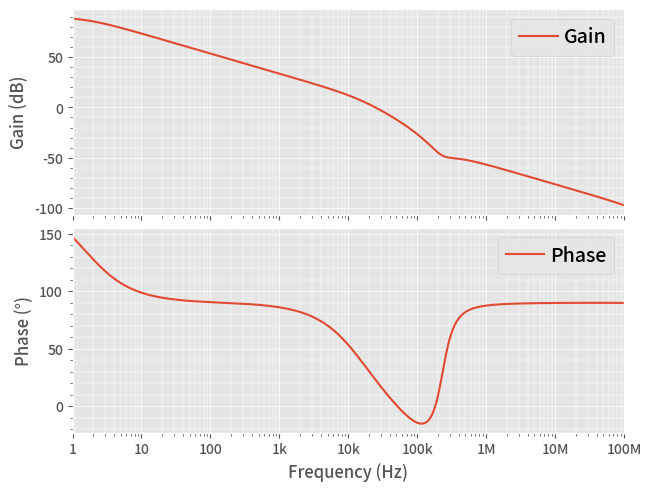

In [2]:
# Prepare a blank plotting area
plt.close("all")
fig2, (axT, axB) = plt.subplots(2,1,sharex=True,constrained_layout=True)

# Plot Bode (AC) curves
df.plot(ax=axT, x="Freq",  y="gain", label="Gain")
df.plot(ax=axB, x="Freq",  y="phase", label="Phase")
run.PrepFreqGainPlot(axT, "Frequency (Hz)", "Gain (dB)", [1,1e8], "auto")
run.PrepFreqGainPlot(axB, "Frequency (Hz)", "Phase (°)", [1,1e8], "auto")

plt.savefig(fname + "_bode.png", format='png', bbox_inches='tight')

plt.show()
plt.close('all')

## 3. Find "fc", "phase-margin" and "gain-margin"

The new method "x0pos2neg()"  <crossing zero from pos to negative> finds basic parameters.

In [3]:
(fc, pm) = run.x0pos2neg(df, "gain", "phase")
(fg0, gmdB) = run.x0pos2neg(df, "phase", "gain")
gm = 10 ** (gmdB/20)

## 4. Nyquist Diagram

To generate a fancy plot, there are many commands but please note that we need only 2 ***df.plot*** lines at minimum.

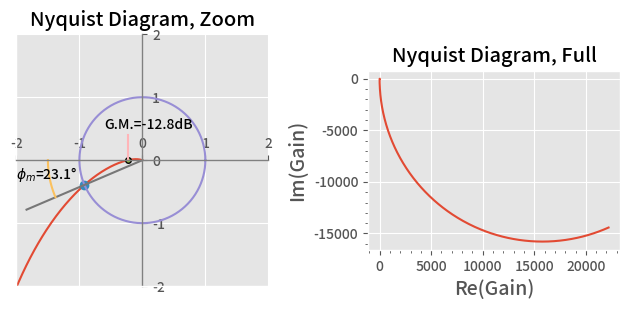

In [4]:
import numpy as np
from numpy import sin, cos, pi, linspace

# Prepare a blank plotting area
plt.close("all")
fig, (ax, axF) = plt.subplots(1,2,tight_layout=True)

# Zoomed Plot, at the left
df.plot(ax=ax, x="reGain",  y="imGain")
# Zoomed Plot, at the left

ax.set_title('Nyquist Diagram, Zoom')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.yaxis.tick_right()
ax.xaxis.tick_top()
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([-2,-1,0,1,2])
ax.spines['top'].set_position(('data', 0))
ax.spines['top'].set_color('gray')
ax.spines['right'].set_position(('data', 0))
ax.spines['right'].set_color('gray')
ax.minorticks_off()
ax.get_legend().remove()
ax.set_aspect("equal", adjustable="box")

ax.plot(-cos(pm/180*pi),-sin(pm/180*pi), marker = 'o')
aar = linspace(0, 2*pi, 100)
xar = cos(aar)
yar = sin(aar)
ax.plot(xar,yar)
ax.plot([-2*cos(pm/180*pi),0],[-2*sin(pm/180*pi),0])

arc = linspace(0, pm/180*pi, 20)
xarc = -1.5 * cos(arc)
yarc = -1.5 * sin(arc)
ax.plot(xarc, yarc)
ax.text(-2,-0.3,r"$\phi_m$={:.1f}°".format(pm))

ax.plot(-gm,0,marker = 'o',markersize=4,markeredgecolor="black")
ax.plot([-gm,-gm], [0,0.4])
ax.text(-0.6,0.5,r"G.M.={:.1f}dB".format(gmdB))

# Full Plot, at the right
df.plot(ax=axF, x="reGain",  y="imGain")
# Full Plot, at the right

axF.set_xlabel('Re(Gain)', fontsize=14)
axF.set_ylabel('Im(Gain)', fontsize=14)
axF.set_aspect("equal", adjustable="box")
axF.get_legend().remove()
axF.set_title('Nyquist Diagram, Full')

run.tstime(['png'])
plt.savefig(run.path['png'], format='png', bbox_inches='tight')
plt.show()

plt.close('all')

In [5]:
run.clean(['cir','qraw','png'])